Import libraries, baca dataset

In [1]:
# libraries
from pandas import DataFrame
import pandas as pd
import numpy as np

# baca file dataset
df = pd.read_csv("Kredit_ku.csv")
print(df)
df.info

     Durasi Riwayat_kredit Tujuan  Jum_kredit Savings Masa_kerja Pekerjaan  \
0         6            A34    A43        1169     A65        A75      A173   
1        48            A32    A43        5951     A61        A73      A173   
2        12            A34    A46        2096     A61        A74      A172   
3        42            A32    A42        7882     A61        A74      A173   
4        24            A33    A40        4870     A61        A73      A173   
..      ...            ...    ...         ...     ...        ...       ...   
144      21            A34    A42        2288     A61        A72      A173   
145      48            A31    A49        3566     A62        A74      A173   
146       6            A34    A40         860     A61        A75      A173   
147      12            A34    A40         682     A62        A74      A173   
148      36            A34    A42        5371     A61        A73      A173   

     Jum_tanggungan  creditScore  
0                 1         

<bound method DataFrame.info of      Durasi Riwayat_kredit Tujuan  Jum_kredit Savings Masa_kerja Pekerjaan  \
0         6            A34    A43        1169     A65        A75      A173   
1        48            A32    A43        5951     A61        A73      A173   
2        12            A34    A46        2096     A61        A74      A172   
3        42            A32    A42        7882     A61        A74      A173   
4        24            A33    A40        4870     A61        A73      A173   
..      ...            ...    ...         ...     ...        ...       ...   
144      21            A34    A42        2288     A61        A72      A173   
145      48            A31    A49        3566     A62        A74      A173   
146       6            A34    A40         860     A61        A75      A173   
147      12            A34    A40         682     A62        A74      A173   
148      36            A34    A42        5371     A61        A73      A173   

     Jum_tanggungan  creditScor

Cek missing value

In [5]:
creditScoreIndex = ['creditScore']
creditScoreDf = pd.DataFrame(columns = ['creditScore'])
creditScoreDf.info

# cek adakah missing value, true = ada; false = tidak ada
creditScoreDf.isnull().values.any()
creditScoreDf.isnull().sum()

creditScore    0.0
dtype: float64

Menghitung komposisi data pada tribut dependent creditScore

In [7]:
df.creditScore.value_counts()

1    112
2     37
Name: creditScore, dtype: int64

Mengetahui informasi dan ukuran atribut independen

In [8]:
dfAttribute = df.drop(creditScoreDf, axis = 1)
dfAttribute.info()
dfAttribute.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Durasi          149 non-null    int64 
 1   Riwayat_kredit  149 non-null    object
 2   Tujuan          149 non-null    object
 3   Jum_kredit      149 non-null    int64 
 4   Savings         149 non-null    object
 5   Masa_kerja      149 non-null    object
 6   Pekerjaan       149 non-null    object
 7   Jum_tanggungan  149 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 9.4+ KB


(149, 8)

Mengetahui missing value atribut independen

In [9]:
# cek apakah missing value
dfAttribute.isnull().values.any()
dfAttribute.isnull().sum()

Durasi            0
Riwayat_kredit    0
Tujuan            0
Jum_kredit        0
Savings           0
Masa_kerja        0
Pekerjaan         0
Jum_tanggungan    0
dtype: int64

Mengetahui atribut yang bertipe kategori

In [10]:
kategoriDf = df.select_dtypes(include=['object'])
kategoriDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Riwayat_kredit  149 non-null    object
 1   Tujuan          149 non-null    object
 2   Savings         149 non-null    object
 3   Masa_kerja      149 non-null    object
 4   Pekerjaan       149 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


Mengetahui atribut yang bertipe numerik

In [11]:
numerikDf = df.select_dtypes(include=['int64'])
numerikDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Durasi          149 non-null    int64
 1   Jum_kredit      149 non-null    int64
 2   Jum_tanggungan  149 non-null    int64
 3   creditScore     149 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


Menampilkan histogram atribut bertipe numerik

In [13]:
numerikIndex = numerikDf.columns
print(numerikIndex)

Index(['Durasi', 'Jum_kredit', 'Jum_tanggungan', 'creditScore'], dtype='object')


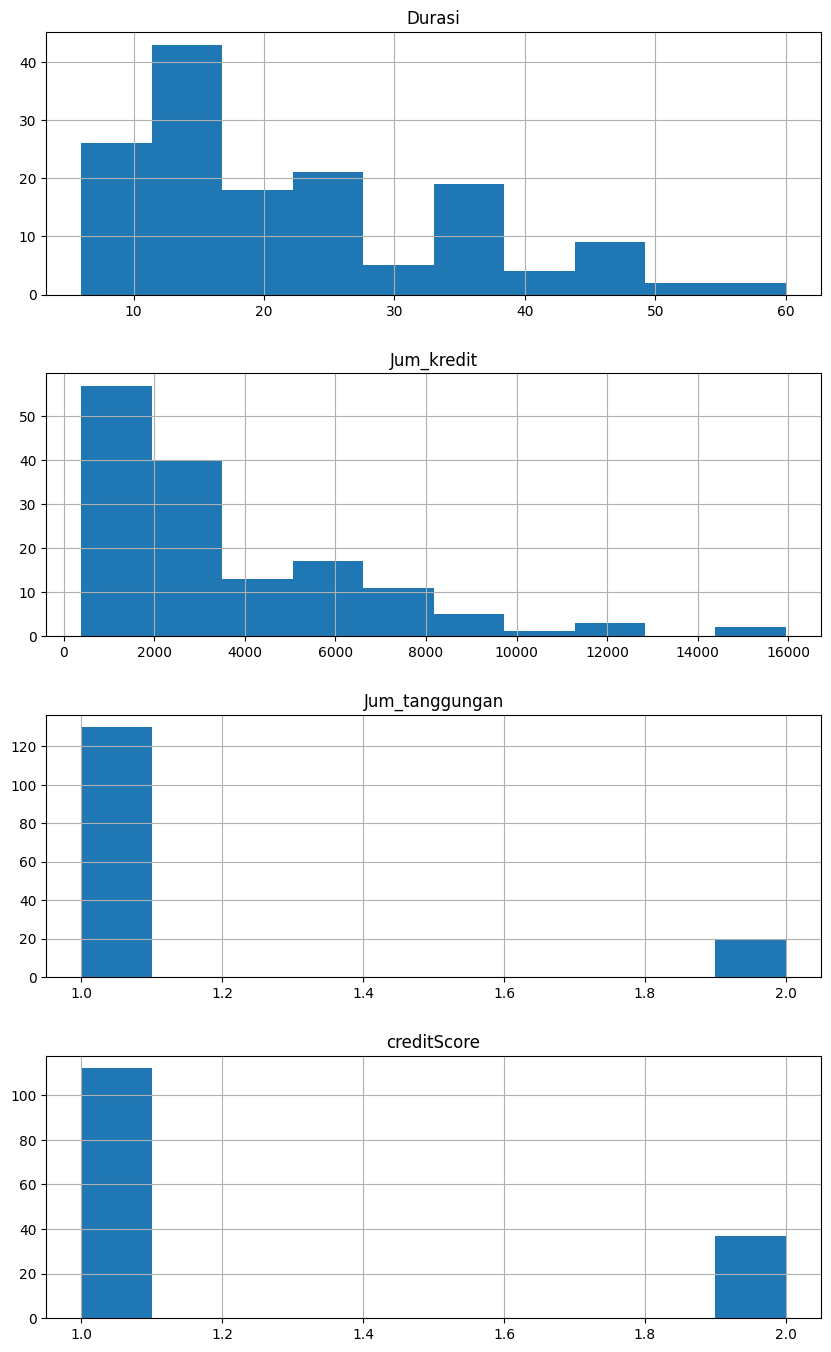

In [14]:
# menampilkan histogram untuk atribut numerik
import matplotlib
import matplotlib.pyplot as plt

df.hist(column=numerikIndex, figsize=(10, 30), layout=(7, 1))
plt.show()

Menampilkan boxplot

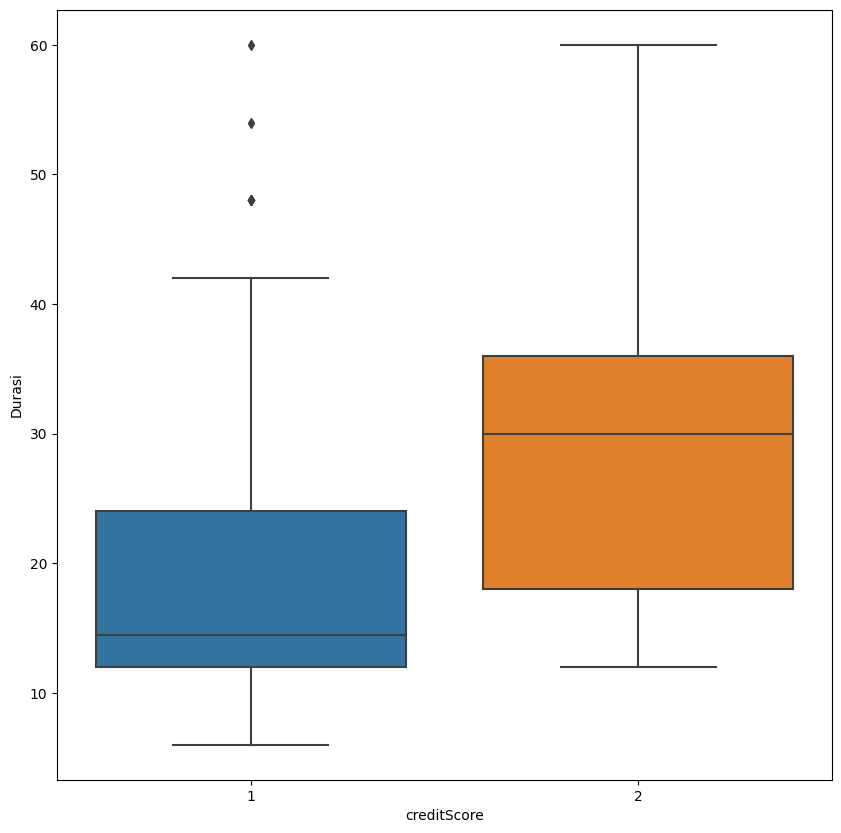

In [15]:
import seaborn as sns

# uji antara dependent dengan umur
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x = "creditScore", y = "Durasi", data = df)
plt.show()

Menampilkan durasi berdasarkan kelas credit score

In [16]:
# credit score dengan usia
df[['creditScore', 'Durasi']].groupby(['creditScore'], as_index = False).mean().sort_values(by = 'Durasi', ascending = False)

,creditScore,Durasi
1,2,29.918919
0,1,19.142857


Melakukan uji hipotesis atribut numerik independen vs atribut dependen

In [18]:
# uji hipotesis
# karena Ho diterima, atribut Durasi terbukti tidak memiliki kontribusi untuk melakukan klasifikasi
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df['Durasi'])) < 3)]

income1 = df[df['creditScore'] == 1]['Durasi']
income0 = df[df['creditScore'] == 2]['Durasi']

income0 = income0.values.tolist()
income0 = random.sample(income0, 10)
income1 = income1.values.tolist()
income1 = random.sample(income1, 10)

ttes, pval = ttest_ind(income1, income0, equal_var=False)
print("ttest", ttes)
print("p value", pval)

if pval < 0.05:
  print("Ho ditolak")
else:
  print("Ho diterima")  

ttest -1.0279928284293551
p value 0.31804087584513563
Ho diterima


In [19]:
# uji hipotesis
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

# uji hipotesis
# karena Ho diterima, atribut Durasi terbukti tidak memiliki kontribusi untuk melakukan klasifikasi
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df['Jum_kredit'])) < 3)]

income1 = df[df['creditScore'] == 1]['Jum_kredit']
income0 = df[df['creditScore'] == 2]['Jum_kredit']

income0 = income0.values.tolist()
income0 = random.sample(income0, 10)
income1 = income1.values.tolist()
income1 = random.sample(income1, 10)

ttes, pval = ttest_ind(income1, income0, equal_var=False)
print("ttest", ttes)
print("p value", pval)

if pval < 0.05:
  print("Ho ditolak")
else:
  print("Ho diterima")  

ttest -1.495386025822812
p value 0.15486083413308618
Ho diterima


In [20]:
# uji hipotesis
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

# uji hipotesis
# karena Ho diterima, atribut Durasi terbukti tidak memiliki kontribusi untuk melakukan klasifikasi
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df['Jum_tanggungan'])) < 3)]

income1 = df[df['creditScore'] == 1]['Jum_tanggungan']
income0 = df[df['creditScore'] == 2]['Jum_tanggungan']

income0 = income0.values.tolist()
income0 = random.sample(income0, 10)
income1 = income1.values.tolist()
income1 = random.sample(income1, 10)

ttes, pval = ttest_ind(income1, income0, equal_var=False)
print("ttest", ttes)
print("p value", pval)

if pval < 0.05:
  print("Ho ditolak")
else:
  print("Ho diterima")  

ttest 0.5999999999999991
p value 0.5565650165675337
Ho diterima


Melakukan uji hipotesis atribut kategori independen vs atribut dependen

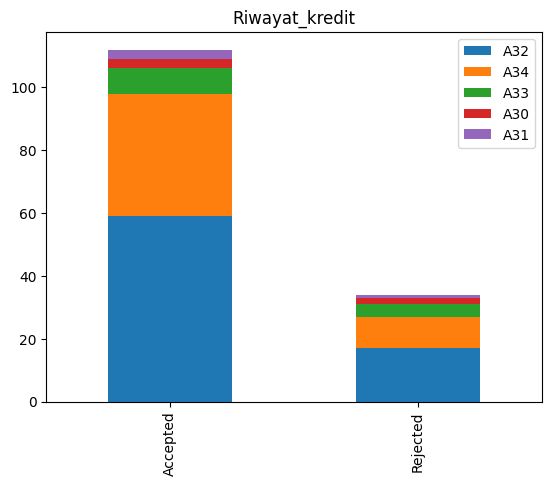

In [23]:
def barChart(feature):
    accepted = df[df['creditScore'] == 1][feature].value_counts()
    rejected = df[df['creditScore'] == 2][feature].value_counts()

    df1 = pd.DataFrame([accepted, rejected])
    df1.index = ['Accepted', 'Rejected']
    df1.plot(kind='bar', stacked=True, fig=(18, 6), title=feature)

barChart("Riwayat_kredit")

Menampilkan tabel kontingensi

In [24]:
# contingency table
cT = pd.crosstab(df['Riwayat_kredit'], df['creditScore'], margins=False)
cT

creditScore,1,2
Riwayat_kredit,,
A30,3,2
A31,3,1
A32,59,17
A33,8,4
A34,39,10


In [25]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(cT)
print("dof=%d" % dof)
print("p_value", p)
print(expected)

# interpet test-statistic
prob = 0.99
critical = chi2.ppf(prob, dof)
print("probabilitas=%.3f, critical=%3.f, stat=%.3f," % (prob, critical, stat))
if abs(stat) >= critical:
  print("Dependent (tolak Ho)")
else:
  print("Independent (Terima Ho)")

dof=4
p_value 0.7853458416600356
[[ 3.83561644  1.16438356]
 [ 3.06849315  0.93150685]
 [58.30136986 17.69863014]
 [ 9.20547945  2.79452055]
 [37.5890411  11.4109589 ]]
probabilitas=0.990, critical= 13, stat=1.730,
Independent (Terima Ho)


Menampilkan Pearson correlation

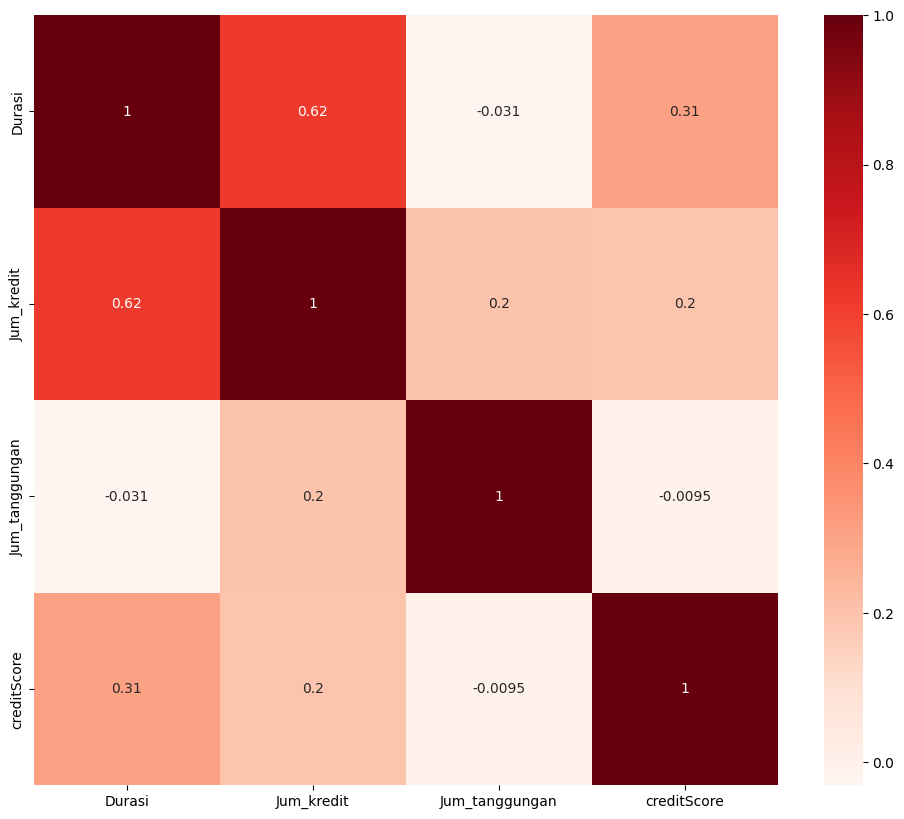

Durasi         0.308726
Jum_kredit     0.196635
creditScore    1.000000
Name: creditScore, dtype: float64

In [27]:
# using Pearson Correlation
plt.figure(figsize=(12, 10))
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# correlation with output variable
corTarget = abs(cor['creditScore'])

# selecting highly correlated features
relevantFeatures = corTarget[corTarget > 0.1]
relevantFeatures